# MPN - Machine Learning

1. **KMeans Clustering**

2. **Linear Regression**

3. **Logistic Regression**


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from collections import Counter

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, export_text

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
merged = pd.read_pickle('merged_20.pkl')

## 1. KMeans clustering.

In [ ]:
"""
%store -r hhd #idk if its gon work like this???? didnt try

X = hhd
Y = X

# Function to plot true labels and cluster labels side by side
def plot_true_vs_clustered(X, true_labels, cluster_labels, cluster_centers=None):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Plot true labels
    axs[0].set_title('True Labels')
    unique_true_labels = set(true_labels)
    colors_true = plt.cm.rainbow(np.linspace(0, 1, len(unique_true_labels)))
    for k, col in zip(unique_true_labels, colors_true):
        class_member_mask = (true_labels == k)
        xy = X[class_member_mask]
        axs[0].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)

    # Plot clustered labels
    axs[1].set_title('Clustered Labels')
    unique_cluster_labels = set(cluster_labels)
    colors_cluster = plt.cm.rainbow(np.linspace(0, 1, len(unique_cluster_labels)))
    for k, col in zip(unique_cluster_labels, colors_cluster):
        class_member_mask = (cluster_labels == k)
        xy = X[class_member_mask]
        axs[1].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
        if cluster_centers is not None and k != -1:
            center = cluster_centers[k]
            axs[1].plot(center[0], center[1], 'o', markerfacecolor=col, markeredgecolor='k', markeredgewidth=2, markersize=14)

    plt.show()

# Function to plot the first two columns
def plot_clustered(X, cluster_centers):
    X = np.asarray(X)
    nfeature = X.shape[-1]
    if nfeature > 2:
        X = X[:,:2]
    if nfeature < 2:
        print("Error")
    # Plot clustered labels
    unique_cluster_labels = set(cluster_labels)
    colors_cluster = plt.cm.rainbow(np.linspace(0, 1, len(unique_cluster_labels)))
    for k, col in zip(unique_cluster_labels, colors_cluster):
        class_member_mask = (cluster_labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col)
    plt.show()

# Generate synthetic data
X, true_labels = make_blobs(n_samples=300, centers=4, cluster_std=0.80, random_state=0)

# KMeans crucial parameters: n_clusters, init, n_init, max_iter, random_state
# This is the method
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
cluster_labels = kmeans.fit_predict(X)

### The algorithm end here, the following code calculates the number of each clusters and plots it
cluster_counts = Counter(cluster_labels)
print(f"Algorithm found {len(cluster_counts)} clusters.")
print("Points per cluster:", cluster_counts)
true_label_counts = Counter(true_labels)
print(f"True labels have {len(true_label_counts)} clusters.")
print("Points per cluster for true labels:", true_label_counts)

# Silhouette Score
print(f"Silhouette Score: {silhouette_score(X, cluster_labels)}\n")

# Plot true labels vs. clustering results
plot_clustered(X, cluster_labels)
#plot_true_vs_clustered(X, true_labels, cluster_labels)
"""

## 2. Linear regression.

In [4]:
# Create separate groups based on 'age', 'gender', and 'education'
# Split age into 5 groups
merged['age_group'] = pd.cut(merged['KLEEFT2'], bins=5)

# Create a MultiIndex DataFrame grouping by 'age_group', 'gender', and 'education'
grouped_data = merged.groupby(['age_group', 'GESLACHT', 'OPLEIDING'])

# Independent variables (multiple predictors)
independent_cols = ['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'OPLEIDING', 'GESLACHT']

# Create an empty list to store regression results
results_list = []

# Perform linear regression for each group
for group_name, group_data in grouped_data:
    # Extract the group's data
    X = group_data[independent_cols]  # Independent variables (predictors)
    y = group_data['HHAUTO_N']  # Dependent variable
    
    # Initialize the linear regression model
    model = LinearRegression()
    
    # Fit the linear regression model
    model.fit(X, y)
    
    # Get coefficients and intercept
    coefficients = model.coef_
    intercept = model.intercept_
    
    # Append results to the list
    results_list.append({
        'Segment': str(group_name),
        'Coefficients': coefficients[0],
        'Intercept': intercept
    })

# Convert the list of dictionaries to a DataFrame
regression_results = pd.DataFrame(results_list)

# Display regression results for each segment
print(regression_results)


/var/folders/f0/g61h031s7yscf43_m6xj3l0c0000gn/T/ipykernel_64785/1825177450.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = merged.groupby(['age_group', 'GESLACHT', 'OPLEIDING'])
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/majamurawka/opt/anaconda3/en

/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

                                             Segment  Coefficients  Intercept
0   (Interval(1.992, 3.6, closed='right'), 1.0, 1.0)      0.127921   0.408611
1   (Interval(1.992, 3.6, closed='right'), 1.0, 3.0)      0.060226   0.569940
2   (Interval(1.992, 3.6, closed='right'), 1.0, 4.0)      0.458493  -1.051724
3   (Interval(1.992, 3.6, closed='right'), 1.0, 5.0)      0.199647   0.363177
4   (Interval(1.992, 3.6, closed='right'), 1.0, 6.0)      0.243163  -0.391314
..                                               ...           ...        ...
78   (Interval(8.4, 10.0, closed='right'), 2.0, 5.0)      0.213747   0.191643
79   (Interval(8.4, 10.0, closed='right'), 2.0, 6.0)      0.309570  -0.266538
80   (Interval(8.4, 10.0, closed='right'), 2.0, 7.0)      0.118142   0.269112
81   (Interval(8.4, 10.0, closed='right'), 2.0, 8.0)      0.187861  -0.257225
82  (Interval(8.4, 10.0, closed='right'), 2.0, 99.0)      0.052993   0.478209

[83 rows x 3 columns]


/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

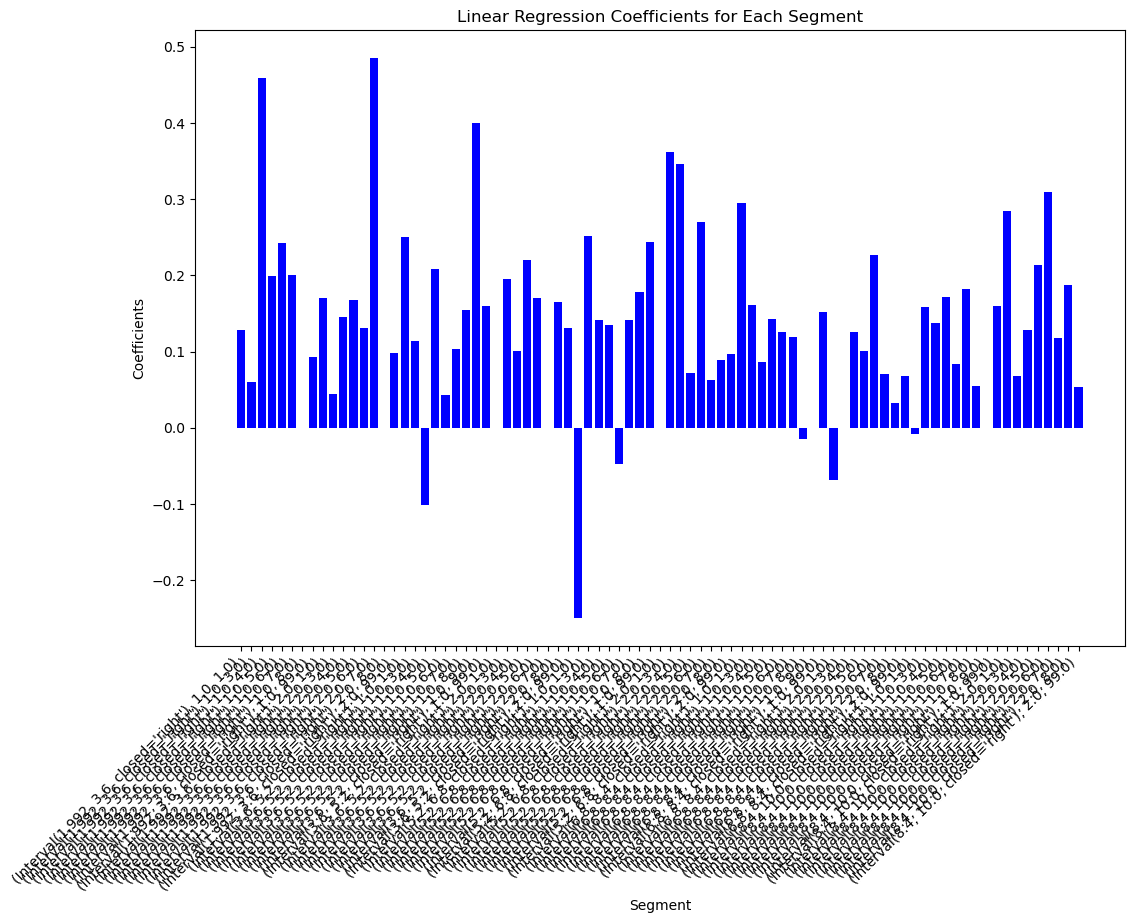

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.bar(regression_results['Segment'], regression_results['Coefficients'], color='blue')
plt.xlabel('Segment')
plt.ylabel('Coefficients')
plt.title('Linear Regression Coefficients for Each Segment')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


/var/folders/f0/g61h031s7yscf43_m6xj3l0c0000gn/T/ipykernel_64785/2656073939.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = merged.groupby(['age_group', 'GESLACHT', 'OPLEIDING'])
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/majamurawka/opt/anaconda3/en

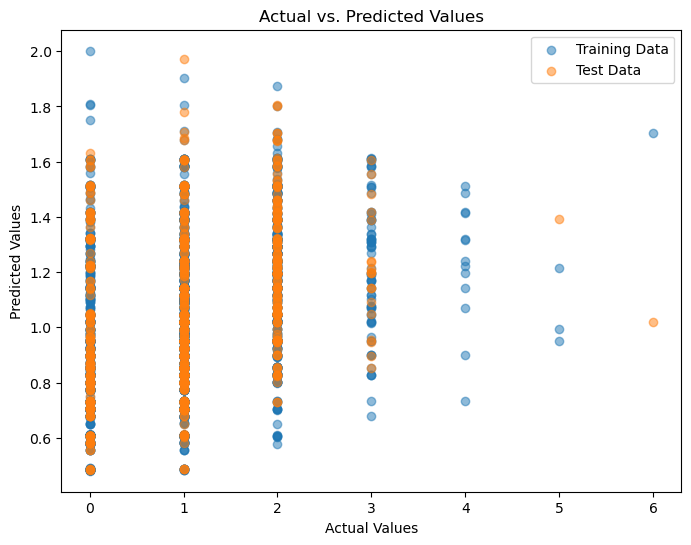

KeyError: 0

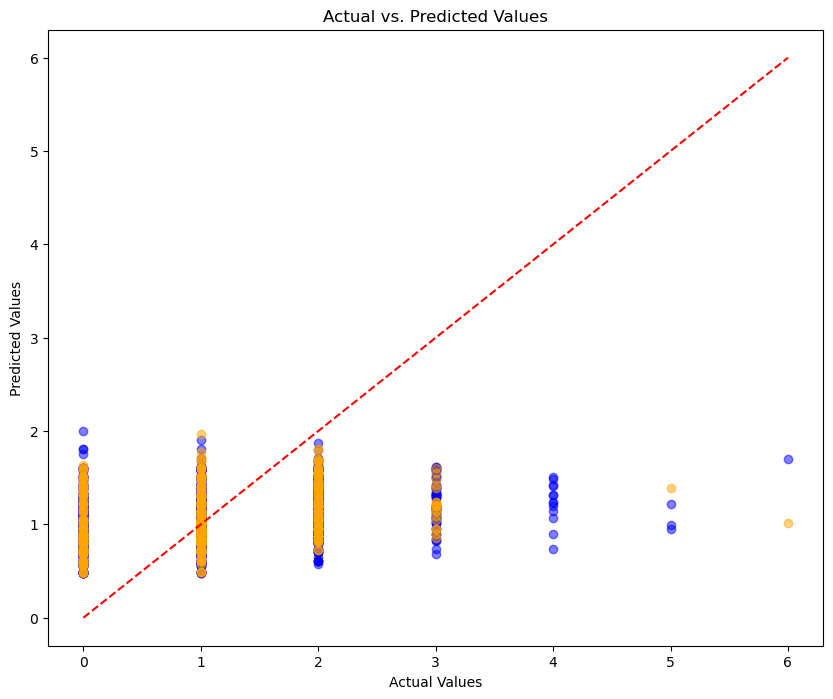

In [6]:
grouped_data = merged.groupby(['age_group', 'GESLACHT', 'OPLEIDING'])

#split dataset
X = merged[['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'OPLEIDING', 'GESLACHT']]
y = merged['HHAUTO_N'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#hyperparameter tuning with GridSearchCV
model = LinearRegression()
#define hyperparameters
params = {'copy_X': [True, False], 'fit_intercept': [True, False], 'positive': [True, False]}

grid_search = GridSearchCV(model, params, cv=5) 
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# plotting actual vs predicted values
predictions_train = best_model.predict(X_train)
predictions_test = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_train, predictions_train, label='Training Data', alpha=0.5)
plt.scatter(y_test, predictions_test, label='Test Data', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

#plotting actual vs predicted numbers
plt.figure(figsize=(10, 8))
plt.scatter(y_train, predictions_train, label='Training Data', alpha=0.5, c='blue')
plt.scatter(y_test, predictions_test, label='Test Data', alpha=0.5, c='orange')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

#line for perfect predictions
max_val = max(max(y_train), max(y_test), max(predictions_train), max(predictions_test))
plt.plot([0, max_val], [0, max_val], linestyle='--', color='red', label='Perfect Prediction Line')

#show numerical values
for i, txt in enumerate(y_train.index):
    plt.annotate(txt, (y_train[i], predictions_train[i]), fontsize=8, color='blue')
for i, txt in enumerate(y_test.index):
    plt.annotate(txt, (y_test[i], predictions_test[i]), fontsize=8, color='orange')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#evaluate model on test set
predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)
#print results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")


/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

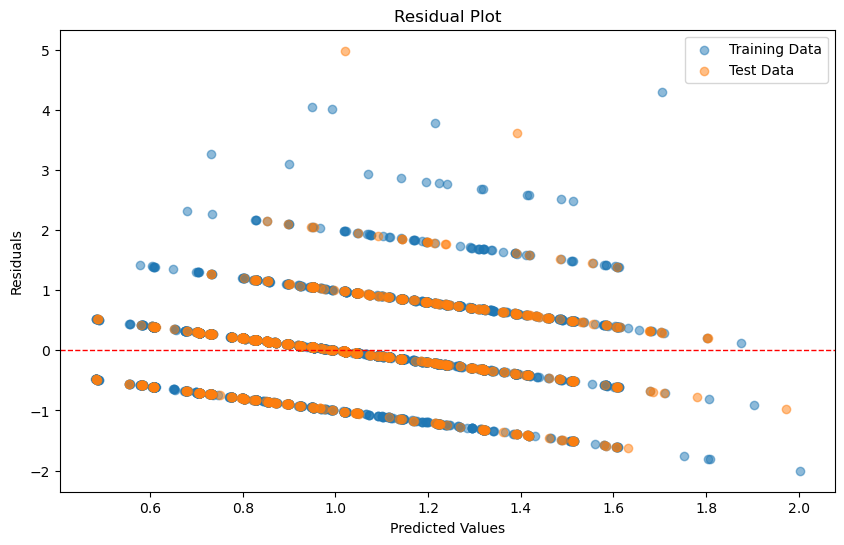

In [7]:
#plot residuals

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


#split the dataset for our features
X = merged[['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'OPLEIDING', 'GESLACHT']]
y = merged['HHAUTO_N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#use linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_residuals = y_train - train_predictions
test_residuals = y_test - test_predictions

plt.figure(figsize=(10, 6))
plt.scatter(train_predictions, train_residuals, label='Training Data', alpha=0.5)
plt.scatter(test_predictions, test_residuals, label='Test Data', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()



In [8]:
#check if columns have a linear relationship to HHAUTO_N

# Perform linear regression for each independent column against the dependent column
for col in merged[['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'OPLEIDING', 'GESLACHT']]:
    # Extract independent and dependent variables
    X = merged[[col]]
    y = merged['HHAUTO_N']
    
    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Print model metrics
    print(f"Column '{col}' - R-squared: {model.score(X, y)}")




Column 'HHBRUTOINK2_w5' - R-squared: 0.0811034038719346
Column 'STED_GM' - R-squared: 0.028169572283206157
Column 'N_KIND' - R-squared: 0.013380917616691024
Column 'OPLEIDING' - R-squared: 0.001110084630321806
Column 'GESLACHT' - R-squared: 0.00017392499322133048


/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

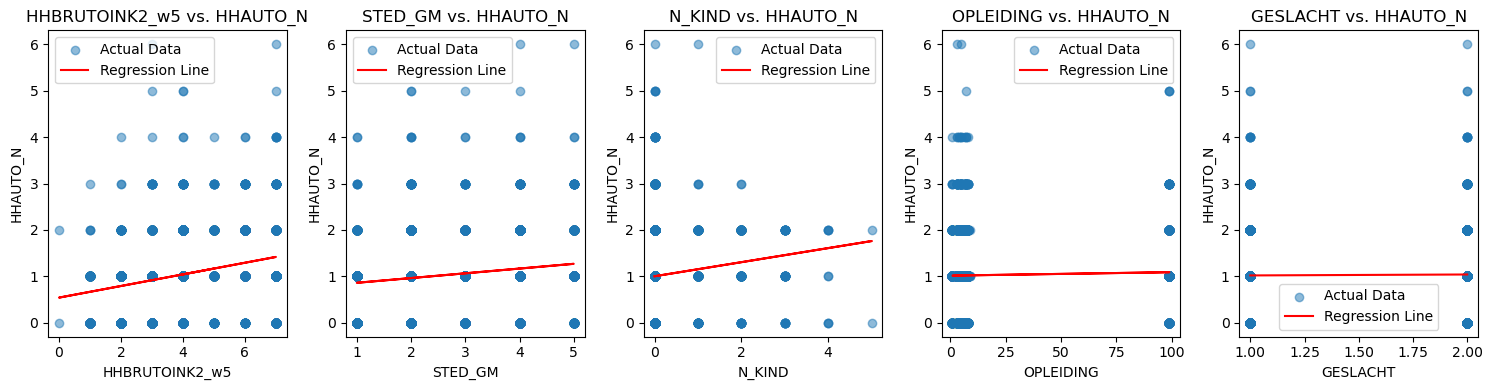

In [9]:
# List of independent columns
independent_cols = ['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'OPLEIDING', 'GESLACHT']
dependent_col = 'HHAUTO_N'

# Set up subplots
fig, axes = plt.subplots(1, len(independent_cols), figsize=(15, 4))

# Perform linear regression for each independent column against the dependent column
for i, col in enumerate(independent_cols):
    # Extract independent and dependent variables
    X = merged[[col]]
    y = merged[dependent_col]
    
    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predictions
    predictions = model.predict(X)
    
    # Plotting
    axes[i].scatter(X, y, label='Actual Data', alpha=0.5)
    axes[i].plot(X, predictions, color='red', label='Regression Line')
    axes[i].set_title(f'{col} vs. {dependent_col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(dependent_col)
    axes[i].legend()

plt.tight_layout()
plt.show()


In [10]:
#anova test on columns

dependent_variable = 'HHAUTO_N'

independent_columns = ['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'OPLEIDING', 'GESLACHT']

#ANOVA test for each independent column
for col in independent_columns:
    formula = f"{dependent_variable} ~ C({col})"
    model = ols(formula, data=merged).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    print(f"ANOVA for {col}:")
    print(anova_table)

ANOVA for HHBRUTOINK2_w5:
                        sum_sq      df          F         PR(>F)
C(HHBRUTOINK2_w5)   272.735047     7.0  74.676661  3.960315e-101
Residual           1821.932381  3492.0        NaN            NaN
ANOVA for STED_GM:
                 sum_sq      df          F        PR(>F)
C(STED_GM)    70.938214     4.0  30.627746  4.287253e-25
Residual    2023.729215  3495.0        NaN           NaN
ANOVA for N_KIND:
                sum_sq      df          F        PR(>F)
C(N_KIND)    40.153883     5.0  13.657507  3.145629e-13
Residual   2054.513546  3494.0        NaN           NaN
ANOVA for OPLEIDING:
                   sum_sq      df         F    PR(>F)
C(OPLEIDING)     4.223304     8.0  0.881604  0.531057
Residual      2090.444125  3491.0       NaN       NaN
ANOVA for GESLACHT:
                  sum_sq      df         F    PR(>F)
C(GESLACHT)     0.364315     1.0  0.608495  0.435408
Residual     2094.303114  3498.0       NaN       NaN


## 3. Logistic Regression

/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning:

Accuracy: 0.5185714285714286
              precision    recall  f1-score   support

         0.0       1.00      0.02      0.03       169
         1.0       0.52      0.96      0.67       352
         2.0       0.51      0.15      0.23       158
         3.0       0.00      0.00      0.00        19
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         1

    accuracy                           0.52       700
   macro avg       0.34      0.19      0.16       700
weighted avg       0.62      0.52      0.40       700



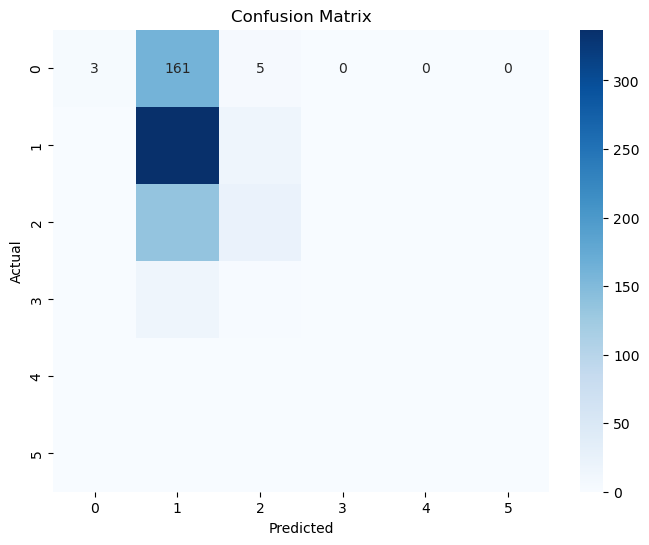

In [11]:
#scale with StandardScaler
scaler = StandardScaler()

#scaler on training data
X_train_scaled = scaler.fit_transform(X_train)

#transform data
X_test_scaled = scaler.transform(X_test)

#independent variables and dependent variable
X = merged[['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'OPLEIDING', 'GESLACHT']]
y = merged['HHAUTO_N']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#logistic regression model
model = LogisticRegression(solver='sag', max_iter=2000)
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)

#model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#extra evaluations and print conf matrix
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# mergedRF with columns of interest
mergedRF = merged[['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'OPLEIDING', 'GESLACHT', 'HHAUTO_N']].copy()

# X & y
X = mergedRF.drop('HHAUTO_N', axis=1)
y = mergedRF['HHAUTO_N']

# training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# random forrest model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# predictions on the test set
y_pred = model.predict(X_test)

model_rf.fit(X, y)
model_rf.score(X, y)

# decision tree after fitting it with values from random forest
model_rf_dt = DecisionTreeRegressor(random_state=42)
model_rf_dt.fit(X_train, y_train)
y_pred = model.predict(X_test)

# calculates mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# get tree rules
tree_rules = export_text(model_rf_dt, feature_names=list(X.columns))
print(tree_rules)

#g ets feature importances and puts them into a df
feature_importances = model_rf_dt.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
display(feature_importance_df.head(20))


/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

Mean Squared Error: 0.6314285714285715
|--- HHBRUTOINK2_w5 <= 2.50
|   |--- STED_GM <= 3.50
|   |   |--- N_KIND <= 0.50
|   |   |   |--- HHBRUTOINK2_w5 <= 1.50
|   |   |   |   |--- OPLEIDING <= 3.50
|   |   |   |   |   |--- OPLEIDING <= 2.00
|   |   |   |   |   |   |--- STED_GM <= 1.50
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- STED_GM >  1.50
|   |   |   |   |   |   |   |--- STED_GM <= 2.50
|   |   |   |   |   |   |   |   |--- GESLACHT <= 1.50
|   |   |   |   |   |   |   |   |   |--- value: [0.67]
|   |   |   |   |   |   |   |   |--- GESLACHT >  1.50
|   |   |   |   |   |   |   |   |   |--- value: [0.50]
|   |   |   |   |   |   |   |--- STED_GM >  2.50
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- OPLEIDING >  2.00
|   |   |   |   |   |   |--- STED_GM <= 1.50
|   |   |   |   |   |   |   |--- GESLACHT <= 1.50
|   |   |   |   |   |   |   |   |--- value: [0.67]
|   |   |   |   |   |   |   |--- GESLACHT >  1.50
|   |   |   |  

/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

,Feature,Importance
0,HHBRUTOINK2_w5,0.316577
3,OPLEIDING,0.273026
1,STED_GM,0.188276
2,N_KIND,0.126043
4,GESLACHT,0.096078


Information over values of variables from MPN website

HHAUTO_N
- Number of cars in the household
- directly measured
- Integer
- Value Range: 0.0 to 6.0

HHBRUNTOINK2_w5
- Gross annual household income aggregated	
- directly measured

- 1	minimum (< € 14,100)
- 2	below the national benchmark income (€ 14,100 - < € 29,500)
- 3	national benchmark income (€ 29,500 - < € 43,500)
- 4	1-2x the national benchmark income (€ 43,500 - < € 73,000)
- 5	2x the national benchmark income (€ 73,000 - < € 87,100)
- 6	more than 2x the national benchmark income (>= € 85,100)
- 7	Do not know / do not want to say



STEM_GM 
- Urbanity
- preloaded

- 1	Very highly urbanized (2500 or more inhabitants/km²)
- 2	Highly urbanized (1500 to 2500 inhabitants/km²)
- 3	Moderately urbanized (1000 to 1500 inhabitants/km²)
- 4	Low urbanization (500 to 1000 inhabitants/km²)
- 5	Non-urbanized area (Less than 500 inhabitants/km²)


N_KIND 
- Number of children <12 years old in the household	
- Integer
- Value Range: 0.0 to 5.0

OPLEIDING
- Highest completed education level	
- preloaded 

- 1	no education/ primary education
- 3	LBO \ VBO \ VMBO (vocational educational programs)
- 4	MAVO\1st 3 years HAVO-VWO\VMBO (junior years high school education)
- 5	MBO
- 6	HAVO and VWO senior high school year(s) \ university propaedeutic diploma
- 7	HBO\WO (Bachelor's degree)
- 8	HBO / WO master's or doctoral degree
- 9	Don't know \ won't say
- 99 person did not complete the questionnaire
- 999 No data known, no imputation from 2018 possible

GESLACHT
- gender
- preloaded

- 1 Man
- 2 Woman



In [13]:
#LINEAR REGRESSION MODEL WITH STATSMODELS OUTPUT - WITH REMOVED 
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm
import numpy as np


# X contains the independent variables, y contains the dependent variable
X = merged[['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'OPLEIDING', 'GESLACHT']]
y = merged['HHAUTO_N']

# Linear Regression
model = LinearRegression()
model.fit(X, y)

# Get coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Create a DataFrame to display coefficients
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
summary = model.summary()
print(summary)

# Print coefficients
print("Coefficients:")
print(coefficients_df)
print(f"\nIntercept: {intercept}")


                            OLS Regression Results                            
Dep. Variable:               HHAUTO_N   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     89.91
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           3.15e-89
Time:                        22:59:23   Log-Likelihood:                -3856.1
No. Observations:                3500   AIC:                             7724.
Df Residuals:                    3494   BIC:                             7761.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2709      0.054      5.

/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

In [14]:
# Replacing values in OPLEIDING column
most_frequent_opleiding = merged['OPLEIDING'].mode()[0]
merged['OPLEIDING'].replace([9, 99, 999], most_frequent_opleiding, inplace=True)

# Replacing value in HHBRUTOINK2_w5 column
most_frequent_hhbrutoink = merged['HHBRUTOINK2_w5'].mode()[0]
merged['HHBRUTOINK2_w5'].replace(7, most_frequent_hhbrutoink, inplace=True)


In [15]:
import numpy as np

# Define the columns to be converted into categorical variables
columns_to_convert = ['HHBRUTOINK2_w5', 'STED_GM', 'OPLEIDING', 'GESLACHT', ]

# Iterate through each column and create dummy variables
for column in columns_to_convert:
    unique_values = sorted(merged[column].unique())  # Get unique values in ascending order
    
    # Set the first value as the baseline
    baseline = unique_values[0]
    
    # Loop through unique values starting from the second one
    for value in unique_values[1:]:
        # Create a new column for each unique value with 1s and 0s
        new_column_name = f'CAT_{column}_{value}'  # Create a new column name
        
        # Use np.where to create dummy variables (1s and 0s)
        merged[new_column_name] = np.where(merged[column] == value, 1, 0)


In [16]:
#LINEAR REGRESSION MODEL WITH STATSMODELS OUTPUT - WITH REMOVED 
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm
import numpy as np


# X contains the independent variables, y contains the dependent variable
X = merged[['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'OPLEIDING', 'GESLACHT', 'CAT_HHBRUTOINK2_w5_1.0',
'CAT_HHBRUTOINK2_w5_2.0',
'CAT_HHBRUTOINK2_w5_3.0',
'CAT_HHBRUTOINK2_w5_4.0',
'CAT_HHBRUTOINK2_w5_5.0',
'CAT_HHBRUTOINK2_w5_6.0',
'CAT_STED_GM_2.0',
'CAT_STED_GM_3.0',
'CAT_STED_GM_4.0',
'CAT_STED_GM_5.0',
'CAT_OPLEIDING_3.0',
'CAT_OPLEIDING_4.0',
'CAT_OPLEIDING_5.0',
'CAT_OPLEIDING_6.0',
'CAT_OPLEIDING_7.0',
'CAT_OPLEIDING_8.0',
'CAT_GESLACHT_2.0']]

y = merged['HHAUTO_N']

# Linear Regression
model = LinearRegression()
model.fit(X, y)

# Get coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Create a DataFrame to display coefficients
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
summary = model.summary()
print(summary)

# Print coefficients
print("Coefficients:")
print(coefficients_df)
print(f"\nIntercept: {intercept}")


                            OLS Regression Results                            
Dep. Variable:               HHAUTO_N   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     38.49
Date:                Tue, 16 Jan 2024   Prob (F-statistic):          7.65e-123
Time:                        22:59:32   Log-Likelihood:                -3750.2
No. Observations:                3500   AIC:                             7538.
Df Residuals:                    3481   BIC:                             7655.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

In [17]:
# Set the target variable
y = merged['HHAUTO_N']

# Ordinal column
X_ord = merged[['N_KIND']]

# Categorical columns
categorical_columns = ['STED_GM', 'OPLEIDING', 'GESLACHT', 'HHBRUTOINK2_w5']

# Convert columns to categorical type
for col in categorical_columns:
    merged[col] = merged[col].astype('category')

# Convert categorical columns to dummies
X_cat = pd.get_dummies(merged[categorical_columns], drop_first=True)

# Concatenate ordinal and dummy variables
X_final = pd.concat([X_ord, X_cat], axis=1)

# Fit the regression model
model = sm.OLS(y, sm.add_constant(X_final)).fit()

# Print the summary
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).